In [1]:
library(terra)
library(sf)
library(raster)
library(tmap)
library(tmaptools)
library(lidR)
library(RStoolbox)
library(future)


terra 1.5.21

Linking to GEOS 3.9.1, GDAL 3.2.1, PROJ 7.2.1; sf_use_s2() is TRUE

Loading required package: sp


Attaching package: 'lidR'


The following objects are masked from 'package:raster':

    area, crs, crs<-, projection, projection<-, wkt


The following object is masked from 'package:sp':

    wkt


The following objects are masked from 'package:terra':

    area, crs, crs<-




***LiDAR***

In [2]:
las_cat <- catalog("I:\\LiDea II and South\\las_files")  # Use catalog instead of readLAScatalog
# projection(las_cat) <- "+proj=utm +zone=17 +ellps=GRS80 +datum=NAD83 +units=m +no_defs "
summary(las_cat)
las_check(las_cat)

class       : LAScatalog (v1.0 format 1)
extent      : 338000, 339500, 5238000, 5239500 (xmin, xmax, ymin, ymax)
coord. ref. : WGS 84 / UTM zone 19N 
area        : 2.25 km²
points      : 9.45 million points
density     : 4.2 points/m²
density     : 3.4 pulses/m²
num. files  : 9 
proc. opt.  : buffer: 30 | chunk: 0
input opt.  : select: * | filter: 
output opt. : in memory | w2w guaranteed | merging enabled
drivers     :
 - Raster : format = GTiff  NAflag = -999999  
 - stars : NA_value = -999999  
 - SpatRaster : overwrite = FALSE  NAflag = -999999  
 - SpatVector : overwrite = FALSE  
 - LAS : no parameter
 - Spatial : overwrite = FALSE  
 - sf : quiet = TRUE  
 - data.frame : no parameter

 Checking headers consistency
  - Checking file version consistency... <U+2713>
  - Checking scale consistency... <U+2713>
  - Checking offset consistency... <U+2713>
  - Checking point type consistency... <U+2713>
  - Checking VLR consistency... <U+2713>
  - Checking CRS consistency... <U+2713>
 C

***Creating a DTM***

class       : LAScatalog (v1.0 format 1)
extent      : 338000, 339500, 5238000, 5239500 (xmin, xmax, ymin, ymax)
coord. ref. : WGS 84 / UTM zone 19N 
area        : 2.25 km²
points      : 9.45 million points
density     : 4.2 points/m²
density     : 3.4 pulses/m²
num. files  : 9 
proc. opt.  : buffer: 20 | chunk: 500
input opt.  : select: * | filter: 
output opt. : in memory | w2w guaranteed | merging enabled
drivers     :
 - Raster : format = GTiff  NAflag = -999999  
 - stars : NA_value = -999999  
 - SpatRaster : overwrite = FALSE  NAflag = -999999  
 - SpatVector : overwrite = FALSE  
 - LAS : no parameter
 - Spatial : overwrite = FALSE  
 - sf : quiet = TRUE  
 - data.frame : no parameter


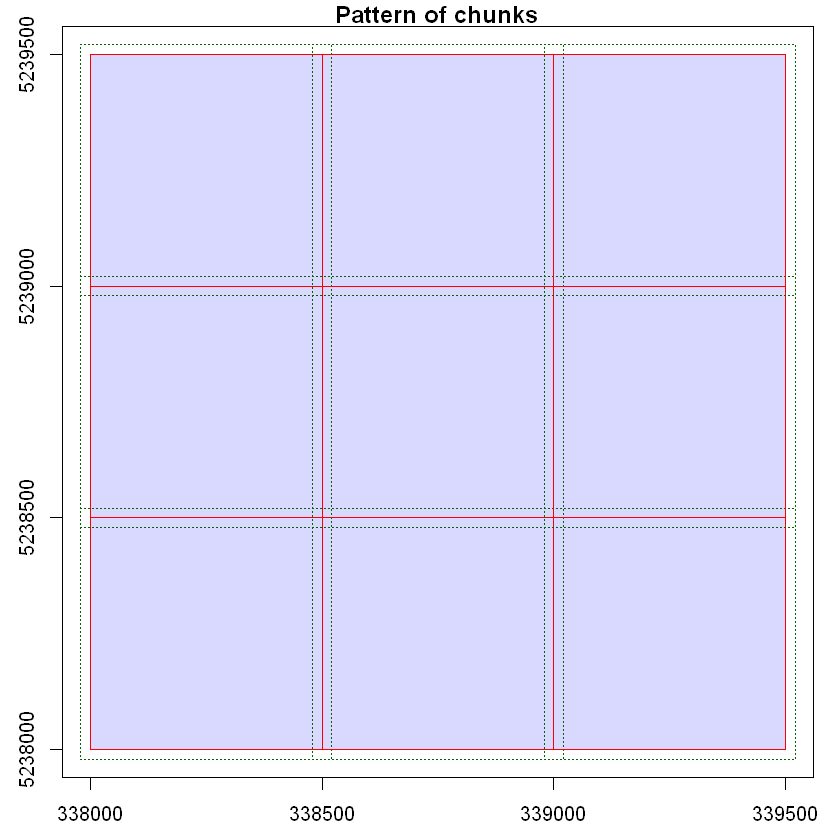

In [3]:
opt_chunk_size(las_cat) <- 500
# plot(las_cat, chunk_pattern = TRUE)
opt_chunk_buffer(las_cat) <- 20
plot(las_cat, chunk_pattern = TRUE)
summary(las_cat)
las_cat@output_options$drivers$Raster$param$overwrite <- TRUE  # overwrite rasters

In [4]:
opt_output_files(las_cat) <- "I:\\LiDea II and South\\las_files\\dtm/dtm_{XLEFT}_{YBOTTOM}"
dtm <- grid_terrain(las_cat, res = 2, knnidw(k = 10, p = 2), keep_lowest = FALSE)

***Plot DTM***

stars_proxy object shown at 750 by 750 cells.



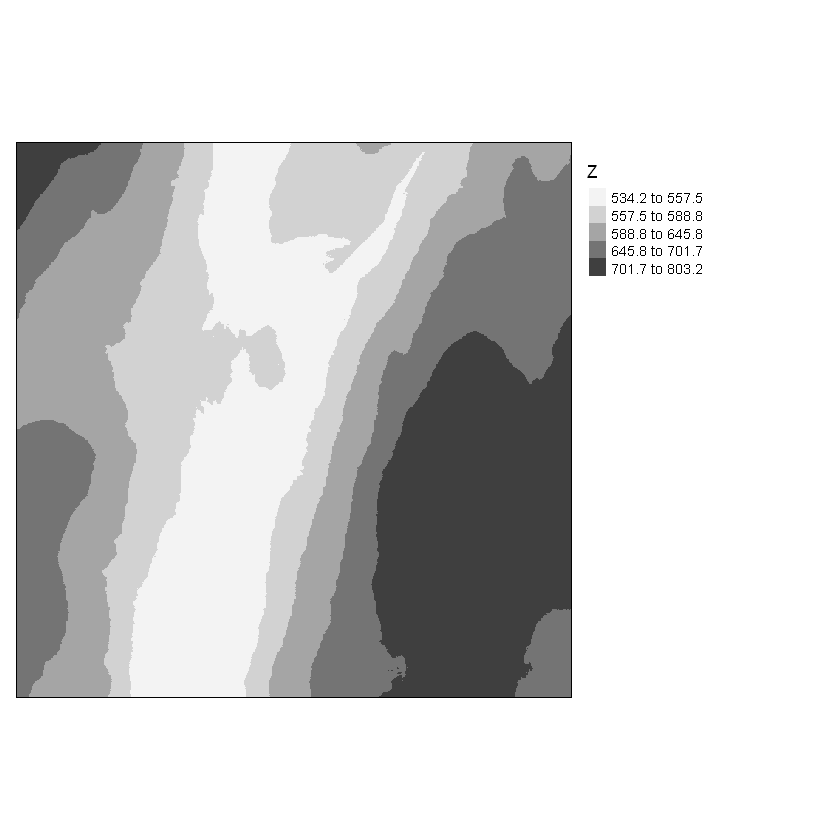

In [5]:
tm_shape(dtm) +
  tm_raster(style= "quantile", palette=get_brewer_pal("Greys", plot=FALSE)) +
  tm_layout(legend.outside = TRUE)

***Creating CHM***

In [6]:
opt_output_files(las_cat) <- "I:\\LiDea II and South\\las_files/norm/norm_{XLEFT}_{YBOTTOM}"
lasnorm <- normalize_height(las_cat, dtm)

In [7]:
opt_output_files(lasnorm) <- "I:\\LiDea II and South\\las_files/chm/chm_{XLEFT}_{YBOTTOM}"
dsm <- grid_canopy(lasnorm, res = 2, pitfree(c(0,2,5,10,15), c(0, 1)))